# Time Series :
    A sequential set of data points measured over time.  
    x(t), t- variable that repersents the elapsed time and t=0,1,2,3,....
### How Time Series is special? 
    It is time dependent. So basic assumption of regression/classification model that the observations are independent doesn't hold in this. 

### Examples:
    Daily temperature
    monthly rain fall
    daily closing price of company stock
    continuous monitoring of a person's heart rate. 

# Auto Regression
    A linear model that uses the dependent relationship between an observation and some number of lagged observations.
    
\begin{equation*}
X_t=\phi_1 X_{t-1}+\phi_2 X_{t-1}....\phi_p X_{t-p}+ w_t \\
X_t= \sum_{i=1}^p \phi_i X_{t-i} + w_t \\
w_t : white noise \sim wn(0,\sigma _w ^2)
\end{equation*}

p : hyper parameter that repersents the length of the direct look back in the series

## Q1) Genarate a time series of 1000 data points with following AR(p) models.
1. AR(0) with $\sigma_w^2=0.3$
2. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.3$
3. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.9$
4. AR(2) with $\sigma_w^2=0.3 , \phi_1=0.4, \phi_2=0.4$
5. AR(2) with $\sigma_w^2=0.3 , \phi_1=0.4, \phi_2=-0.4$


Visualize all 5 time series using subplots and give proper legends and titles. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def ar(p, fi, varw):
    time_series = []
    for i in range(p):
        time_series.append(np.random.normal(0,varw))
    for i in range(p,1000):
        tk = 0
        for k in range(1,p+1):
            tk += fi[k-1]*time_series[i-k]
        tk += np.random.normal(0,varw)
        time_series.append(tk)
    return time_series
                

In [9]:
x = np.linspace(1,1000,1000)

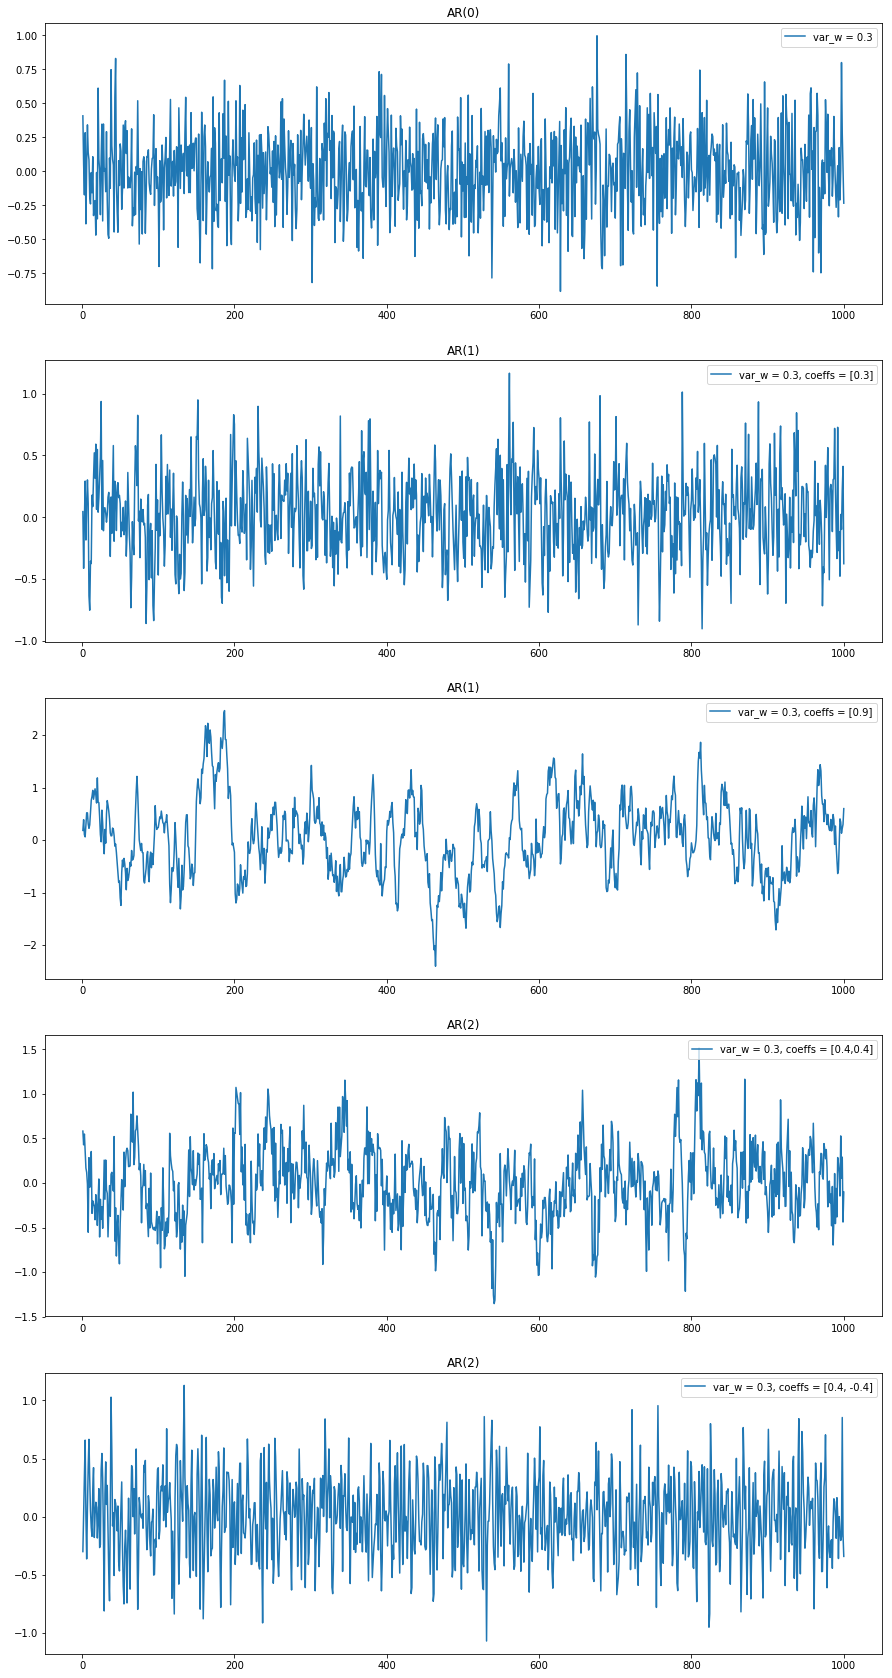

In [28]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (15,30))
ar_1 = ar(0,[],0.3)
ax[0].plot(x, ar_1, label = "var_w = 0.3")
ax[0].set_title("AR(0)")
ax[0].legend(loc = "upper right")
ar_2 = ar(1, [0.3], 0.3)
ax[1].plot(x, ar_2, label = "var_w = 0.3, coeffs = [0.3]")
ax[1].set_title("AR(1)")
ax[1].legend(loc = "upper right")
ar_3 = ar(1, [0.9], 0.3)
ax[2].plot(x, ar_3, label = "var_w = 0.3, coeffs = [0.9]")
ax[2].set_title("AR(1)")
ax[2].legend(loc = "upper right")
ar_4 = ar(2, [0.4,0.4], 0.3)
ax[3].plot(x, ar_4, label = "var_w = 0.3, coeffs = [0.4,0.4]")
ax[3].set_title("AR(2)")
ax[3].legend(loc = "upper right")
ar_5 = ar(2, [0.4,-0.4], 0.3)
ax[4].plot(x, ar_5, label = "var_w = 0.3, coeffs = [0.4, -0.4]")
ax[4].set_title("AR(2)")
ax[4].legend(loc = "upper right")

## Q2)  Genarate a time series of 1000 data points with following AR(p) models.
1. AR(1) with $\sigma_w^2=0.3 , \phi_1=1.005$
2. AR(1) with $\sigma_w^2=0.3 , \phi_1=-1.005$



Visualize the time series using subplots and give proper legends and titles. 
State how it is different from times series generated from Q1.

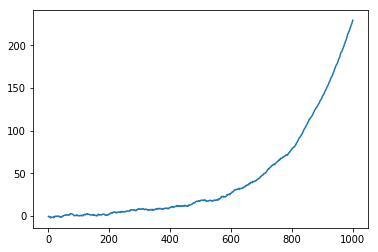

In [11]:
ar_1 = ar(1, [1.005], 0.3)
plt.plot(x, ar_1)

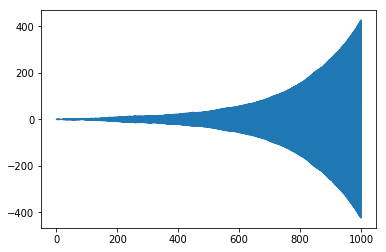

In [12]:
ar_2 = ar(1,[-1.005], 0.3)
plt.plot(x, ar_2)

The difference is that they are continuosly increasing and unbounded where as in the first question they are bound, also the properties of the series in question1 remain constant where as in question2 a) the mean and variance are continuously increasing
b) mean remains constant but variance is continuously increasing

## Q3) Generate AR(1)  time series of 1000 data points with following parameters and visualize their autocovariance. 
1. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.1$
2. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.8$
3. AR(1) with $\sigma_w^2=0.3 , \phi_1=-0.4$

## Auto covariance: 
 
$Cov(X_t, X_{t-k})=E[(X_t - \mu)(X_{t-k} -\mu)]$ <br>

$ Cov(X_t, X_{t-k})=\frac {1}{(N-1)} \sum_{i=0}^{N-k} ( x_i - \mu )( x_{i+k} - \mu )$ <br>

To identify the dominant periods in the time series.


In [15]:
def acf(series):
    n = len(series)
    acf_l = []
    acf_l.append(np.var(series))
    series_mean = np.mean(series)
    for l in range(1,n):
        sum_e = 0
        for k in range(n-l):
            sum_e += (series[k] - series_mean)*(series[k+l] - series_mean)
        acf_l.append((sum_e/(n-1)))
    return acf_l

In [45]:
x = np.linspace(0,999,1000)

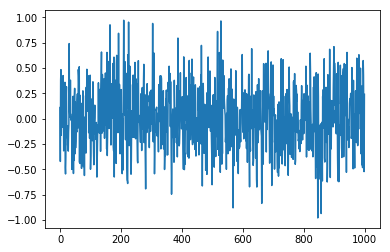

In [46]:
ar_1 = ar(1,[0.1], 0.3)
plt.plot(x, ar_1)

<StemContainer object of 3 artists>

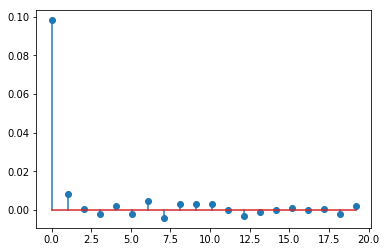

In [43]:
acf_ar_1 = acf(ar_1)
plt.stem(x[:20],  acf_ar_1[:20])

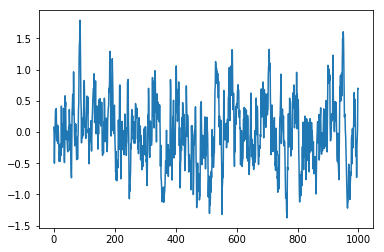

In [34]:
ar_2 = ar(1,[0.8], 0.3)
plt.plot(x, ar_2)

<StemContainer object of 3 artists>

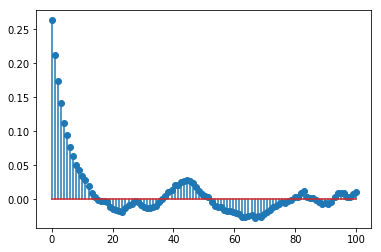

In [42]:
acf_ar_2 = acf(ar_2)
plt.stem(x, acf_ar_2[:100])

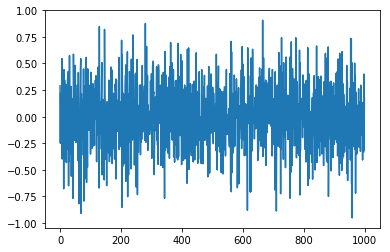

In [47]:
ar_3 = ar(1,[-0.4], 0.3)
plt.plot(x, ar_3)

<StemContainer object of 3 artists>

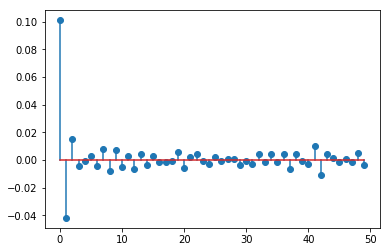

In [49]:
acf_ar_3 = acf(ar_3)
plt.stem(x[:50], acf_ar_3[:50])

## Q4) Given an AR(1) model try to find its $\phi$. 
Dataset : ar_1.csv <br>
Noise  : $W_t \sim N(0,0.3)$ <br>
$X_t=\phi_1 X_{t-1}+ w_t$ <br>
Compute the $\phi$


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('ar_1.csv')

In [34]:
data.head()

,Time,Data
0,0,-0.406162
1,1,-0.284250
2,2,-0.251490
3,3,-0.522161
4,4,-0.255867


In [5]:
data['shifted_data'] = np.roll(data['Data'].values, 1)

In [6]:
data.head()

,Time,Data,shifted_data
0,0,-0.406162,-0.750211
1,1,-0.284250,-0.406162
2,2,-0.251490,-0.284250
3,3,-0.522161,-0.251490
4,4,-0.255867,-0.522161


In [13]:
X = data['Data'].values[1:].reshape(-1,1)
y = data['shifted_data'].values[1:].reshape(-1,1)
print(X.shape)
print(y.shape)

(1000, 1)
(1000, 1)


In [14]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lr.coef_

array([[0.82646541]])

## Q5) Try to fit and forcast time series for a given real time data set using inbuilt ar library. 
Dataset : Electricity_comsumption_hourly.csv
Predict last 12 data points and compare with the actual data point. 

Train anf test data :

X=data['DEOK_MW'].values <br>
train, test = X[1:len(X)-12], X[len(X)-12:]

Inbuilt AR function : from statsmodels.tsa.ar_model import AR

In [31]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [12]:
data = pd.read_csv('Electricity_comsumption_hourly.csv')

In [14]:
data.head()

,Datetime,DEOK_MW
0,2012-12-31 01:00:00,2945.0
1,2012-12-31 02:00:00,2868.0
2,2012-12-31 03:00:00,2812.0
3,2012-12-31 04:00:00,2812.0
4,2012-12-31 05:00:00,2860.0


In [13]:
X = data['DEOK_MW'].values

In [22]:
train, test = X[1:len(X)-12], X[len(X)-12:]

In [23]:
ar_model = AR(train)

In [24]:
ar_model_fit = ar_model.fit()

In [26]:
predictions = ar_model_fit.predict(start = len(train), end = len(train) + len(test) -1 )

In [28]:
x = data['Datetime'].values[len(X)-12:]

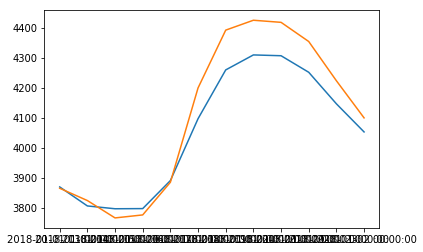

In [30]:
plt.plot(x, predictions)
plt.plot(x, test)

In [32]:
mean_squared_error(predictions, test)

6207.13288515176